In [1]:
import cv2 as cv 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import keras
import glob
import math
import numpy as np
import os

# Model Number

In [3]:
path = 'C:/Users/Shahab/Downloads/Jupyter/Car-license-Plate/My-Code/Project/Create-Model-alphabet-and-number/Data/Number'
imagefiles = glob.glob(os.path.join(path, '*.png'))
imagefiles.sort()

data = []
for filename in imagefiles:
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    data.append(img)

num_images = len(data)


lst = []
for i in imagefiles:
    try:
        lst.append(int(i[118:-4]))
    except:
        print(i)
    if int(i[118:-4]) > 9:
        print(i)
y = np.array(lst)

print(num_images)
print(y)

3951
[1 6 9 ... 4 6 9]


In [4]:
pd.Series(y).value_counts()

2    537
6    495
7    478
1    468
8    442
9    406
4    370
5    364
3    336
0     55
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data,y, test_size=0.2, random_state=42)

In [6]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)

xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [7]:
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import layers  
import numpy as np  
import matplotlib.pyplot as plt  

In [8]:
model = keras.Sequential([  
    layers.Conv2D(64, 5, activation='relu', padding='SAME', input_shape=(28, 28, 1)),  
    layers.MaxPooling2D(2),  
    layers.Conv2D(128, 3, activation='relu', padding='SAME'),  
    layers.MaxPooling2D(2),  
    layers.Conv2D(256, 3, activation='relu', padding='SAME'),  
    layers.MaxPooling2D(2),  
    layers.Flatten(),  
    layers.Dense(200, activation='relu'),  
    layers.Dropout(0.5),  # اضافه کردن Dropout  
    layers.Dense(100, activation='relu'),  
    layers.Dropout(0.5),  # اضافه کردن Dropout  
    layers.Dense(50, activation='relu'),  
    #layers.Dropout(0.5),  # اضافه کردن Dropout  
    layers.Dense(10, activation='softmax')  
])  

C:\Users\Shahab\qenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [10]:
history = model.fit(xtrain, ytrain, epochs=100, validation_split = 0.20)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.1263 - loss: 2.2799 - val_accuracy: 0.1139 - val_loss: 2.2563
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.1345 - loss: 2.2420 - val_accuracy: 0.2184 - val_loss: 2.0916
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.2965 - loss: 1.9422 - val_accuracy: 0.6820 - val_loss: 1.0395
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5729 - loss: 1.1981 - val_accuracy: 0.7848 - val_loss: 0.6233
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.7504 - loss: 0.7616 - val_accuracy: 0.8639 - val_loss: 0.4477
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.7833 - loss: 0.5916 - val_accuracy: 0.8797 - val_loss: 0.4025
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.8494 - loss: 0.4338 - val_accuracy: 0.8987 - val_loss: 0.3258
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8682 - loss: 0.3626 - val_accuracy: 0.

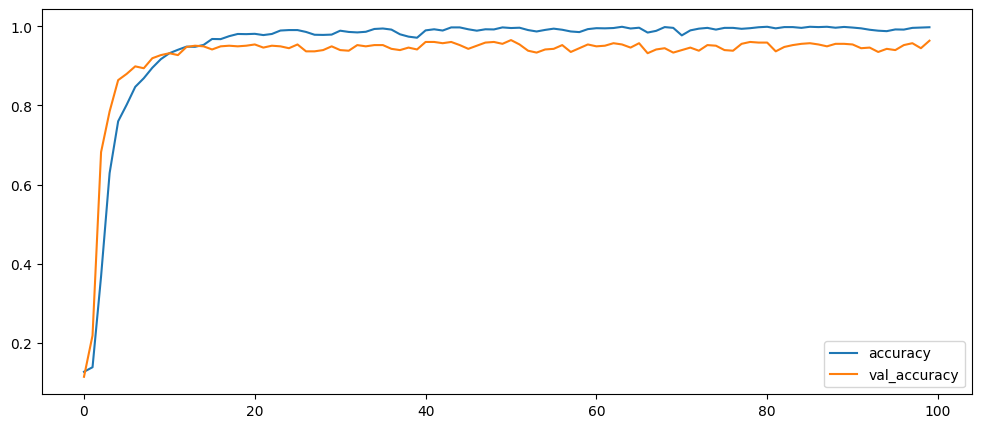

In [11]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend()

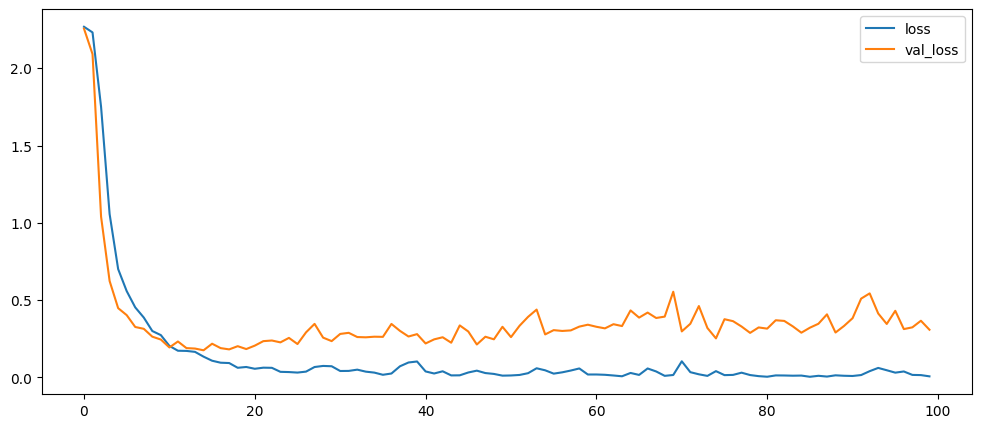

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend()

In [13]:
loss_accuracy = model.evaluate(np.array(xtest), ytest, verbose=0)
print('loss:', loss_accuracy[0])
print('accuracy:', loss_accuracy[1])

loss: 0.3502042591571808
accuracy: 0.9557521939277649


In [14]:
y_pred = model.predict(np.array(xtest))

y_predd = []
for i in range(len(y_pred)):
    y_predd.append(y_pred[i].argmax())

y_pred = np.array(y_predd)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      0.97      0.95       101
           2       0.99      0.90      0.94        97
           3       0.91      1.00      0.95        72
           4       0.97      0.91      0.94        74
           5       0.94      1.00      0.97        60
           6       0.97      0.95      0.96        87
           7       0.99      0.98      0.99       109
           8       0.96      0.92      0.94       102
           9       0.93      0.99      0.96        80

    accuracy                           0.96       791
   macro avg       0.96      0.96      0.96       791
weighted avg       0.96      0.96      0.96       791



<Axes: >

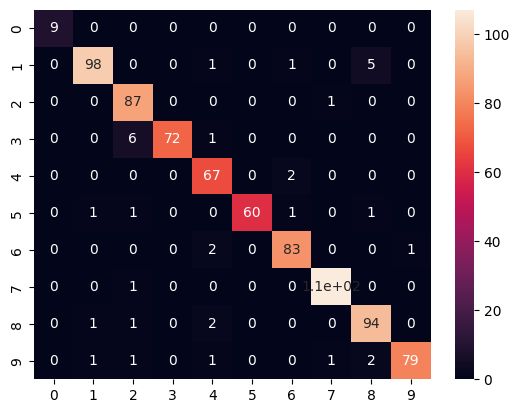

In [15]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(y_pred, ytest), annot=True)

In [16]:
#model.save('model_number.h5')

# Model Alphabet

In [17]:
path = 'C:/Users/Shahab/Downloads/Jupyter/Car-license-Plate/My-Code/Project/Create-Model-alphabet-and-number/Data/Alphabet'
imagefiles = glob.glob(os.path.join(path, '*.png'))
imagefiles.sort()

data = []
for filename in imagefiles:
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    data.append(img)

num_images = len(data)


lst = []
for i in imagefiles:
    try:
        lst.append(int(i[120:-4]))
    except:
        print(i)
    if int(i[120:-4]) < 10:
        print(i)
y = np.array(lst)

print(num_images)
print(y)

611
[13 18 13 15 21 21 21 10 11 17 16 10 19 10 20 21 16 11 20 12 11 18 14 11
 20 13 14 10 16 13 13 10 17 17 17 17 16 16 11 10 16 18 10 10 13 14 18 18
 18 20 24 24 10 10 10 25 17 17 20 14 16 16 15 13 20 10 16 14 14 14 16 10
 10 23 23 15 23 21 15 17 21 10 16 23 23 14 19 11 14 19 21 21 21 23 17 22
 16 16 17 21 13 24 10 14 17 13 18 20 18 16 21 19 13 19 11 18 18 22 21 13
 14 23 13 19 18 11 25 11 19 10 17 10 11 13 17 19 19 14 17 11 21 13 10 14
 17 14 19 11 21 10 14 18 13 14 14 14 16 18 10 21 18 18 15 17 16 23 13 10
 23 17 21 19 15 20 10 16 21 21 21 24 24 11 13 13 14 11 10 16 11 14 16 18
 11 15 25 11 17 24 10 19 19 18 16 10 19 22 16 16 11 23 13 16 20 10 16 19
 18 13 13 19 13 15 23 19 10 10 16 16 25 15 21 20 17 10 17 21 10 10 15 10
 20 17 18 20 10 11 16 10 24 14 22 24 11 19 10 14 23 17 24 16 21 17 18 10
 16 17 14 10 10 10 10 15 21 14 10 14 20 17 10 16 17 24 18 17 17 16 24 16
 16 14 14 21 13 17 25 25 15 24 24 20 20 14 14 11 11 20 20 20 20 16 20 20
 18 18 23 11 11 17 17 17 18 18 14 14 14 20 20 2

In [18]:
pd.Series(y).value_counts()

19    84
10    58
13    52
17    50
14    50
16    46
18    43
11    43
20    41
21    35
24    31
15    28
23    24
25    21
22     4
12     1
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data,y, test_size=0.2, random_state=42)

In [20]:
xtrain = np.array(xtrain)
xtest = np.array(xtest)

xtrain = xtrain / 255.0
xtest = xtest / 255.0

In [21]:
model = keras.Sequential([  
    layers.Conv2D(64, 5, activation='relu', input_shape=(28, 28, 1)),  
    layers.MaxPooling2D(2),  
    layers.Conv2D(128, 3, activation='relu'),  
    layers.MaxPooling2D(2),  
    layers.Conv2D(256, 3, activation='relu'),  
    layers.MaxPooling2D(2), 
    layers.Flatten(),  
    layers.Dense(200, activation='relu'),  
    layers.Dropout(0.5), 
    layers.Dense(100, activation='relu'),  
    layers.Dropout(0.5),
    layers.Dense(50, activation='relu'),  
    #layers.Dropout(0.4), 
    layers.Dense(26, activation='softmax')  
])  

C:\Users\Shahab\qenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [23]:
history = model.fit(xtrain, ytrain, epochs=100, validation_split = 0.20)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.0642 - loss: 3.2475 - val_accuracy: 0.1633 - val_loss: 3.1595
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1088 - loss: 3.1041 - val_accuracy: 0.1429 - val_loss: 2.9576
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1109 - loss: 2.9999 - val_accuracy: 0.1429 - val_loss: 2.8608
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0975 - loss: 2.8702 - val_accuracy: 0.1429 - val_loss: 2.8784
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0967 - loss: 2.8561 - val_accuracy: 0.1429 - val_loss: 2.7075
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1041 - loss: 2.7734 - val_accuracy: 0.1429 - val_loss: 2.7161
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0814 - loss: 2.7210 - val_accuracy: 0.1429 - val_loss: 2.6890
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1218 - loss: 2.6937 - val_accuracy: 0.

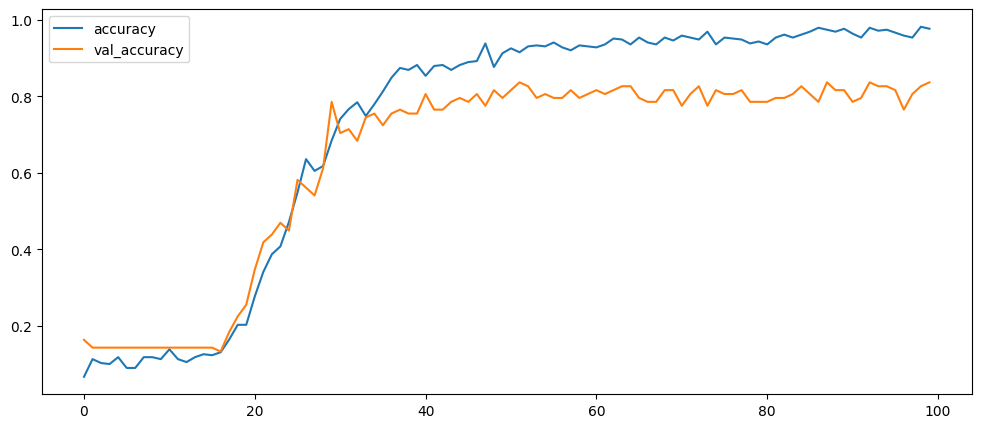

In [24]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend()

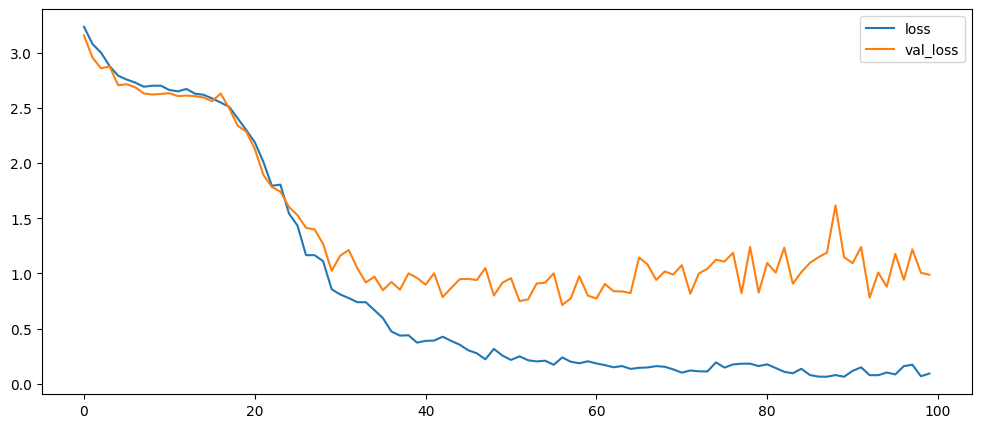

In [25]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend()

In [26]:
loss_accuracy = model.evaluate(np.array(xtest), ytest, verbose=0)
print('loss:', loss_accuracy[0])
print('accuracy:', loss_accuracy[1])

loss: 1.0829867124557495
accuracy: 0.7886179089546204


In [27]:
y_pred = model.predict(np.array(xtest))

y_predd = []
for i in range(len(y_pred)):
    y_predd.append(y_pred[i].argmax())

y_pred = np.array(y_predd)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


              precision    recall  f1-score   support

          10       0.79      1.00      0.88        11
          11       0.90      1.00      0.95         9
          13       0.45      0.50      0.48        10
          14       0.62      1.00      0.76         8
          15       1.00      0.75      0.86         4
          16       0.86      0.67      0.75         9
          17       0.89      0.80      0.84        10
          18       1.00      0.80      0.89         5
          19       0.79      1.00      0.88        15
          20       0.80      0.80      0.80         5
          21       0.91      0.77      0.83        13
          22       0.00      0.00      0.00         1
          23       1.00      0.71      0.83         7
          24       1.00      0.80      0.89        10
          25       0.25      0.17      0.20         6

    accuracy                           0.79       123
   macro avg       0.75      0.72      0.72       123
weighted avg       0.80   

C:\Users\Shahab\qenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahab\qenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shahab\qenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

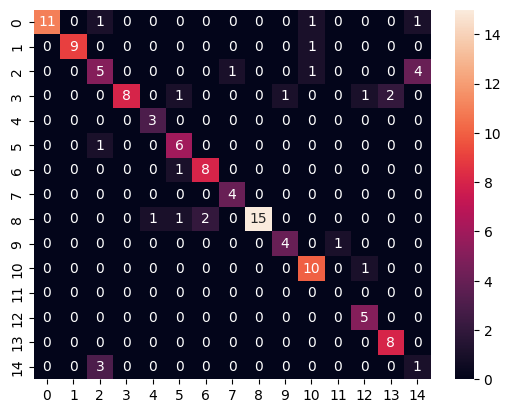

In [28]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(y_pred, ytest), annot=True)

In [29]:
#model.save('model_alphabet.h5')